# Import packages

In [11]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# STATSMODELS
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import zscore

# SKLEARN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from mlxtend.evaluate import bias_variance_decomp

# CASE STUDY 5 - CAR SALES

## Part 1

## Car sales dataset (cleaned)

In [32]:
# Load cleaned dataset
file_path = "/Users/goncalogago/Desktop/POS_G_AI_ML/Trabalho_Supervised_learning/case_8_games_training.csv"
df_games = pd.read_csv(file_path, parse_dates=['date'], dayfirst=True)
df_games.head()

,app_id,average,mediantime,owners,players,price,date,action,adventure,anime,casual,earlyaccess,freetoplay,indie,multiplayer,openworld,singleplayer,sports,strategy,zombies,kgames,activision,bethesdasoftworks,electronicarts,rockstargames,sega,squareenix,thqnordic,telltalegames,valve,warnerbros,bioware,capcom,cdprojektred,dice,firaxisgames,gearboxsoftware,iointeractive,lucasarts,mumbojumbo,obsidianentertainment,relicentertainment,squareenixdev,telltalegamesdev,thecreativeassembly,treyarch,tripwireinteractive,ubisoftdev,valvedev,metascore,userscore,positive,negative,original,dummy
0,10,661.0000,74.0000,12656037,368822.0000,9.9900,2006-09-01,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,88.0000,97.0000,66949.0000,1490.0000,01/09/2016,0
1,10,690.0000,71.0000,12617378,363721.0000,9.9900,2006-09-02,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,88.0000,97.0000,66989.0000,1489.0000,02/09/2016,0
2,10,681.0000,74.0000,12570654,358609.0000,9.9900,2006-09-03,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,88.0000,97.0000,67033.0000,1491.0000,03/09/2016,0
3,10,656.0000,72.0000,12507511,356800.0000,9.9900,2006-09-04,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,88.0000,97.0000,67087.0000,1493.0000,04/09/2016,0
4,10,588.0000,71.0000,12524101,360397.0000,9.9900,2006-09-05,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,88.0000,97.0000,67137.0000,1495.0000,05/09/2016,0


In [33]:
df_games.describe()

,app_id,average,mediantime,owners,players,price,date,action,adventure,anime,casual,earlyaccess,freetoplay,indie,multiplayer,openworld,singleplayer,sports,strategy,zombies,kgames,activision,bethesdasoftworks,electronicarts,rockstargames,sega,squareenix,thqnordic,telltalegames,valve,warnerbros,bioware,capcom,cdprojektred,dice,firaxisgames,gearboxsoftware,iointeractive,lucasarts,mumbojumbo,obsidianentertainment,relicentertainment,squareenixdev,telltalegamesdev,thecreativeassembly,treyarch,tripwireinteractive,ubisoftdev,valvedev,metascore,userscore,positive,negative,dummy
count,220923.0000,134839.0000,134839.0000,220923.0000,134839.0000,188148.0000,220923,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,220923.0000,42236.0000,195179.0000,195179.0000,195179.0000,220923.0000
mean,299663.6358,200.2690,183.2752,224998.5524,13107.0123,10.3714,2006-09-15 13:15:18.026642688,0.4079,0.3151,0.0482,0.2516,0.0724,0.0629,0.5470,0.0909,0.0365,0.0095,0.0399,0.2072,0.0219,0.0030,0.0077,0.0027,0.0043,0.0014,0.0081,0.0082,0.0083,0.0054,0.0033,0.0033,0.0003,0.0020,0.0004,0.0003,0.0007,0.0005,0.0004,0.0016,0.0033,0.0005,0.0005,0.0038,0.0056,0.0001,0.0011,0.0003,0.0035,0.0029,72.7343,73.1177,1483.1841,257.0448,0.0000
min,10.0000,1.0000,1.0000,465.0000,465.0000,0.1900,2006-09-01 00:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,22.0000,0.0000,0.0000,0.0000,0.0000
25%,239090.0000,30.0000,26.0000,3861.0000,533.0000,4.9900,2006-09-08 00:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,67.0000,62.0000,19.0000,6.0000,0.0000
50%,332800.0000,103.0000,80.0000,17889.0000,1018.0000,8.9900,2006-09-16 00:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,74.0000,77.0000,69.0000,24.0000,0.0000
75%,401810.0000,211.0000,176.0000,96525.0000,2806.0000,12.9900,2006-09-23 00:00:00,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,80.0000,89.0000,329.0000,98.0000,0.0000
max,511380.0000,19979.0000,20082.0000,83083482.0000,11351556.0000,300.0000,2006-09-30 00:00:00,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,96.0000,100.0000,1340212.0000,108025.0000,0.0000
std,141529.5826,481.5248,550.1431,1520186.0195,203021.0008,9.4537,NaN,0.4914,0.4646,0.2141,0.4339,0.2592,0.2427,0.4978,0.2875,0.1876,0.0971,0.1956,0.4053,0.1465,0.0546,0.0876,0.0520,0.0658,0.0368,0.0898,0.0900,0.0907,0.0735,0.0570,0.0570,0.0165,0.0451,0.0202,0.0165

In [44]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220923 entries, 0 to 220922
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   app_id                 220923 non-null  int64         
 1   average                134839 non-null  float64       
 2   mediantime             134839 non-null  float64       
 3   owners                 220923 non-null  int64         
 4   players                134839 non-null  float64       
 5   price                  188148 non-null  float64       
 6   date                   220923 non-null  datetime64[ns]
 7   action                 220923 non-null  int64         
 8   adventure              220923 non-null  int64         
 9   anime                  220923 non-null  int64         
 10  casual                 220923 non-null  int64         
 11  earlyaccess            220923 non-null  int64         
 12  freetoplay             220923 non-null  int6

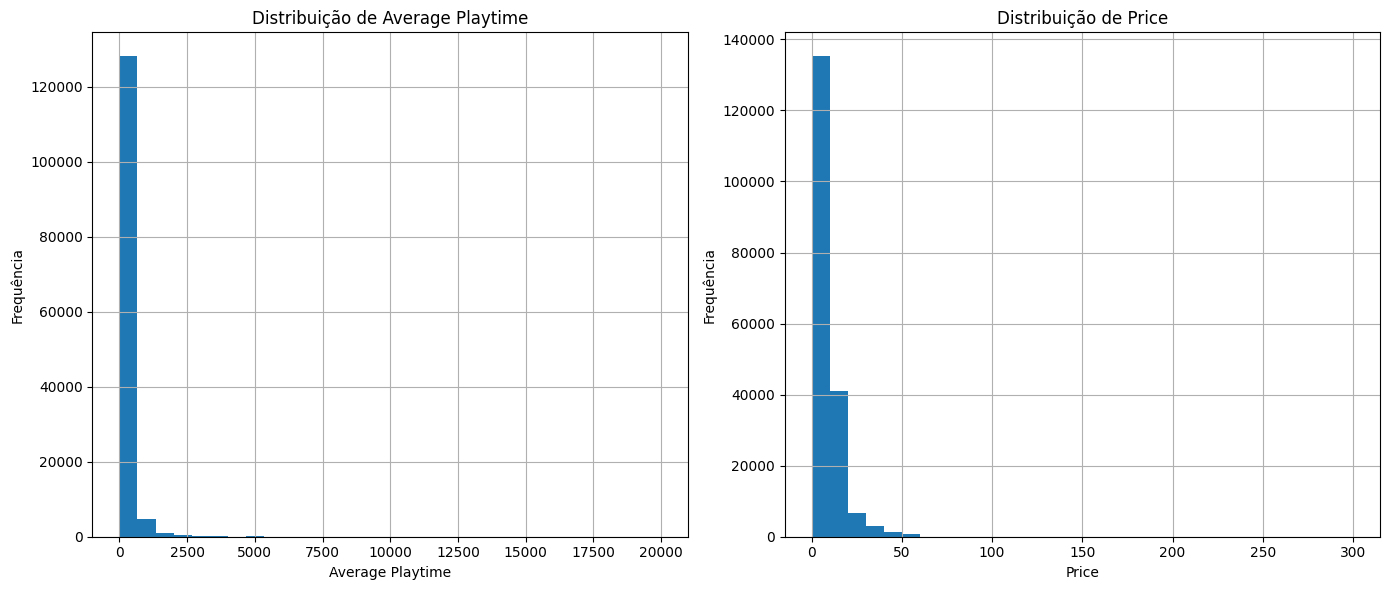

In [47]:
# Exemplo de histograma para variáveis numéricas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df_games['average'].hist(bins=30, ax=axes[0])
axes[0].set_title('Distribuição de Average Playtime')
axes[0].set_xlabel('Average Playtime')
axes[0].set_ylabel('Frequência')

df_games['price'].hist(bins=30, ax=axes[1])
axes[1].set_title('Distribuição de Price')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

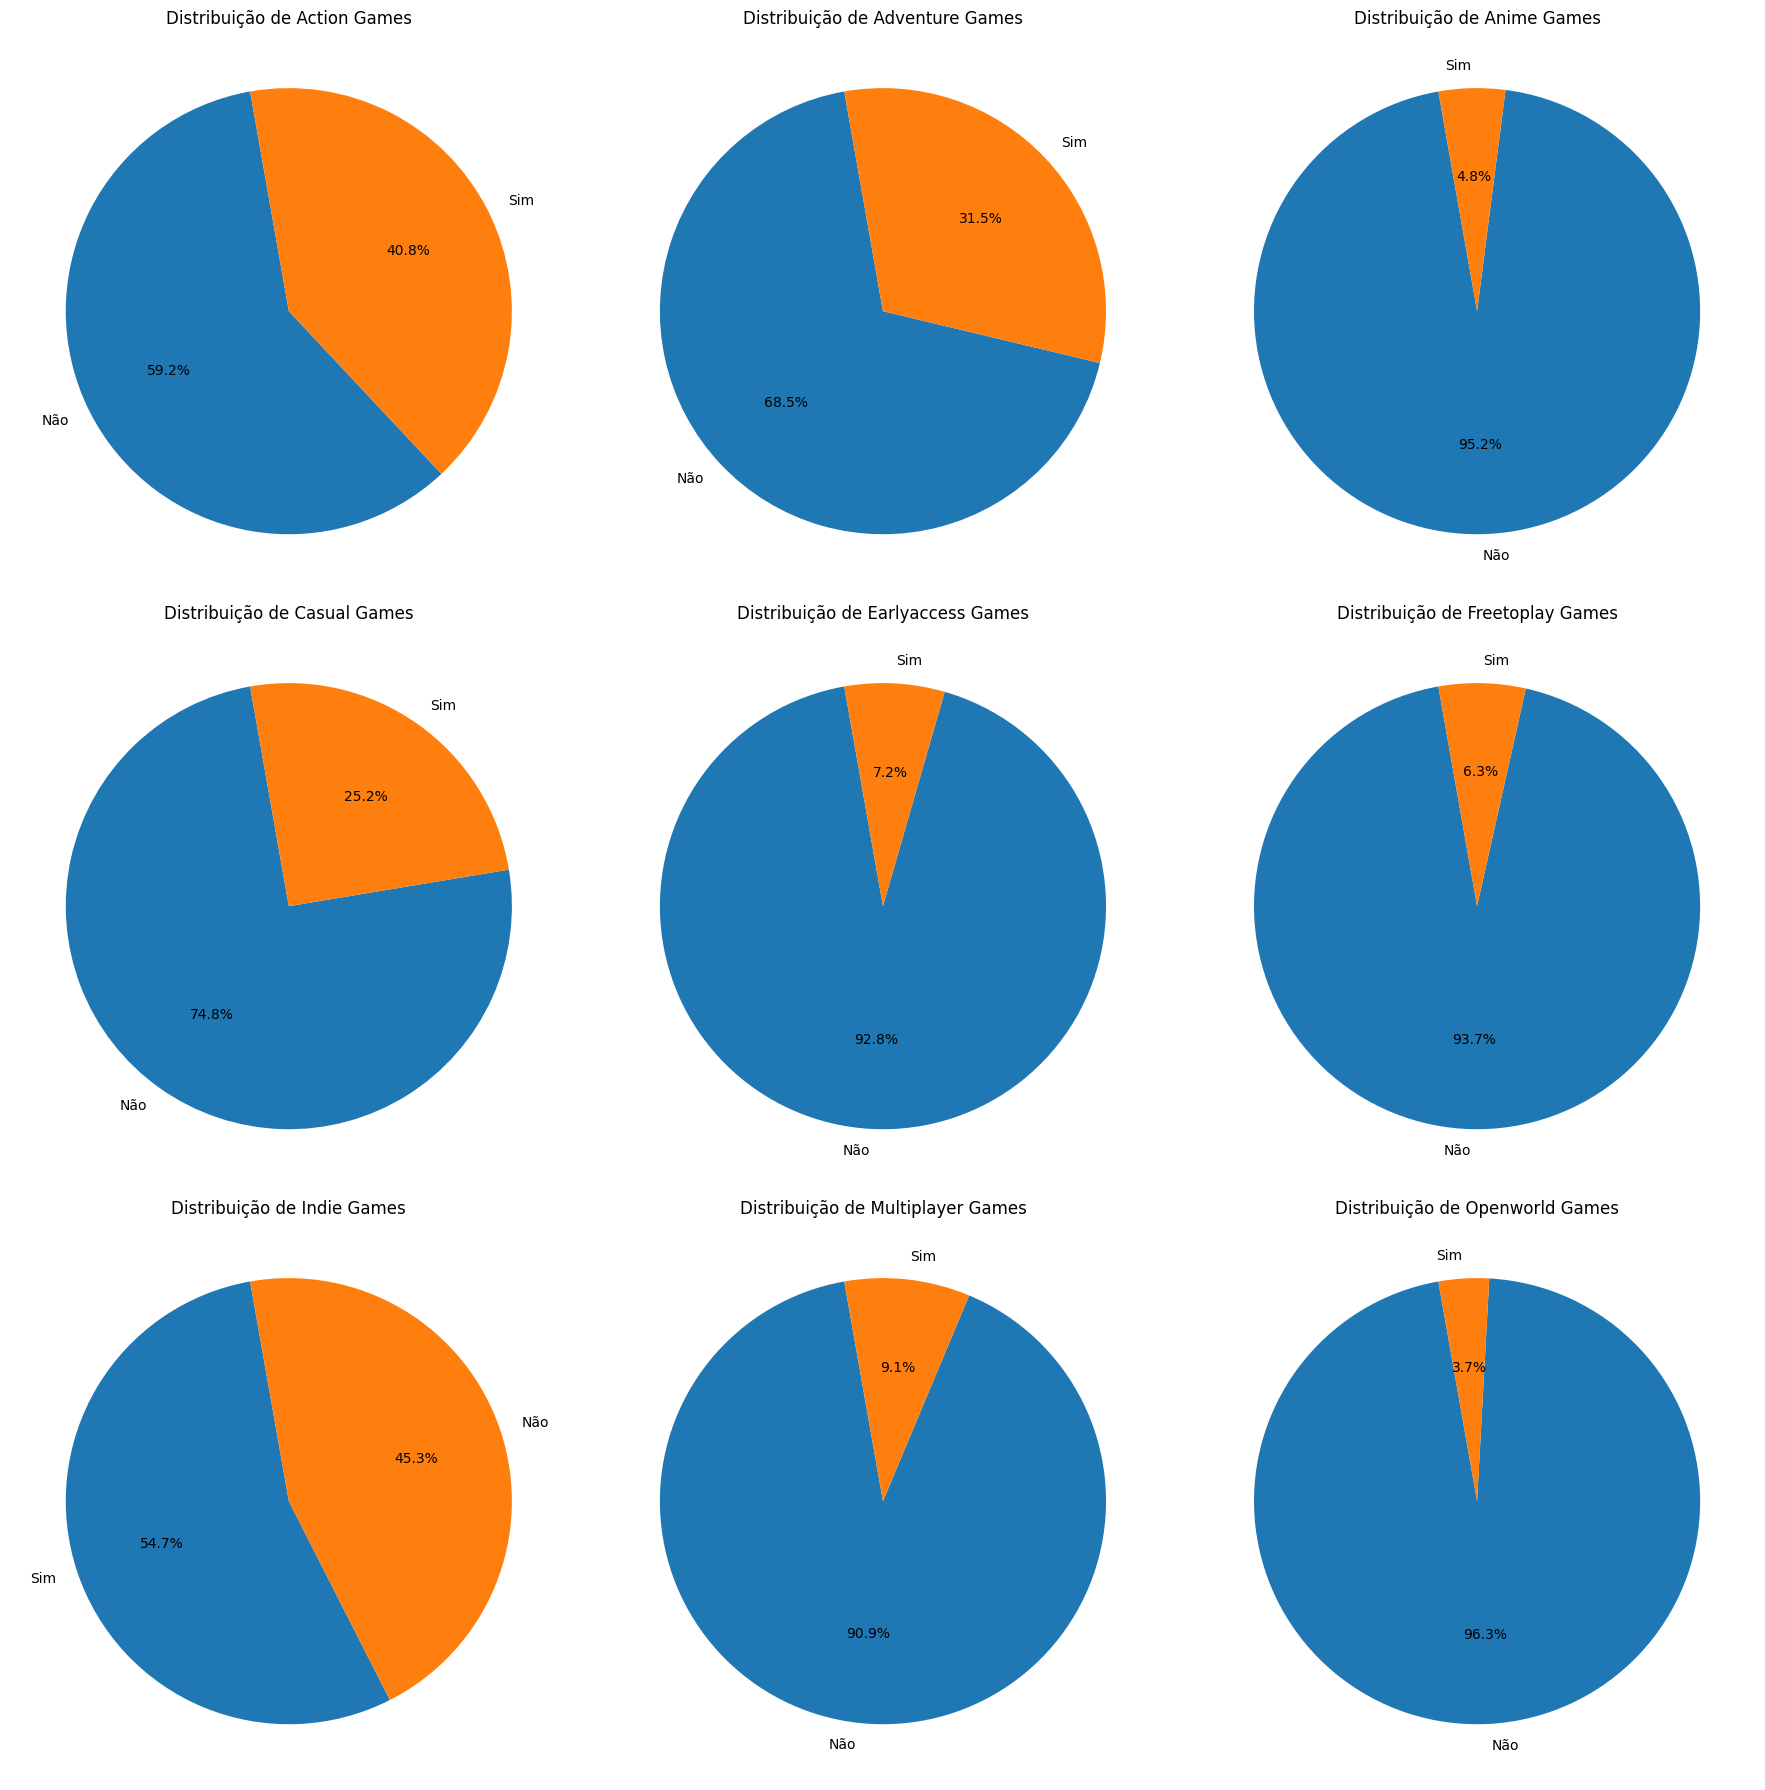

In [57]:
# Lista das variáveis categóricas de interesse
categorical_variables = [
    'action', 'adventure', 'anime', 'casual', 'earlyaccess', 
    'freetoplay', 'indie', 'multiplayer', 'openworld'
]

# Substituir 1 por 'Sim' e 0 por 'Não' nas variáveis categóricas binárias
df_games[categorical_variables] = df_games[categorical_variables].replace({1: 'Sim', 0: 'Não'})

# Criar os gráficos de pizza para as variáveis categóricas binárias (0 ou 1) após a substituição
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

for var, ax in zip(categorical_variables, axes.flatten()):
    counts = df_games[var].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%0.1f%%', startangle=100)
    ax.set_title(f'Distribuição de {var.capitalize()} Games')

plt.tight_layout()
plt.show()

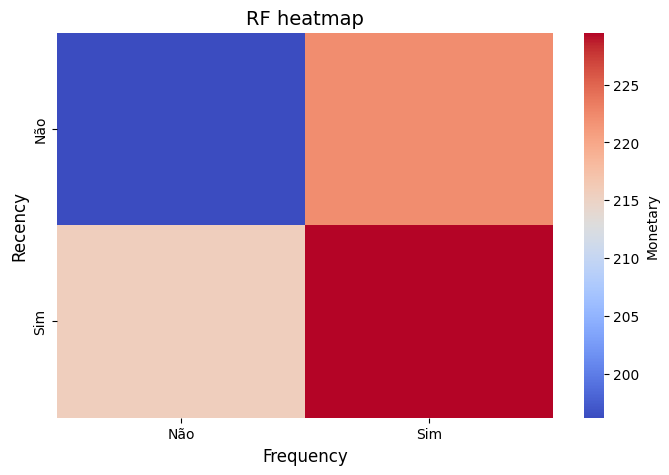

In [58]:
# Define the RFM quartiles and bin labels
df_games_data_heat = df_games[["multiplayer", "anime", "average"]]
df_games_pivot = df_games_data_heat.pivot_table(index='multiplayer', columns='anime', values='average')

# Create a heatmap using seaborn
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(df_games_pivot, cmap='coolwarm', annot=False, cbar=True, cbar_kws={'label': 'average'})

# Set the axis labels and title
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Recency', fontsize=12)
ax.set_title('RF heatmap', fontsize=14)

plt.show()

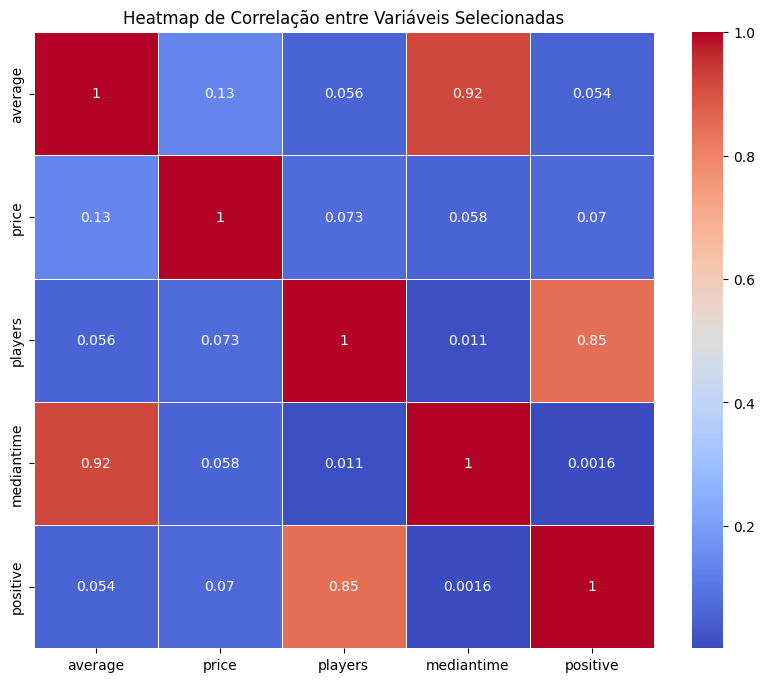

In [62]:
# Selecionar 5 variáveis de interesse para análise de correlação
selected_variables = ['average', 'price', 'players', 'mediantime', 'positive']

# Calcular a matriz de correlação para as variáveis selecionadas
correlation_matrix = df_games[selected_variables].corr()

# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap de Correlação entre Variáveis Selecionadas')
plt.show()
